In [ ]:
import pandas as pd
import numpy as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')

In [ ]:
df=pd.read_csv('/content/SpotifyFeatures.csv',encoding='latin-1')

In [ ]:
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0      99373.0   0.910             0.000  C#    0.3460    -1.828  Major   
1     137373.0   0.737             0.000  F#    0.1510    -5.559  Minor   
2     170267.0   0.131             0.000   C    0.1030   -13.879  Minor   
3     152427.0   0.326             0.000  C#    0.0985   -12.178  Major   
4      82625.0   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969          4-Apr    0.814  
1       0.0868  174.003          4-Apr    0.816  
2       0.0362   99.488          4-May    0.368  
3       0.0395  171.758          4-Apr    0.227  
4       0.0456  140.576          4-Apr    0.390

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113122 entries, 0 to 113121
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             113122 non-null  object 
 1   artist_name       113122 non-null  object 
 2   track_name        113122 non-null  object 
 3   track_id          113122 non-null  object 
 4   popularity        113122 non-null  int64  
 5   acousticness      113122 non-null  float64
 6   danceability      113121 non-null  float64
 7   duration_ms       113121 non-null  float64
 8   energy            113121 non-null  float64
 9   instrumentalness  113121 non-null  float64
 10  key               113121 non-null  object 
 11  liveness          113121 non-null  float64
 12  loudness          113121 non-null  float64
 13  mode              113121 non-null  object 
 14  speechiness       113121 non-null  float64
 15  tempo             113121 non-null  float64
 16  time_signature    11

In [ ]:
df.describe()

popularity   acousticness   danceability   duration_ms  \
count  113122.000000  113122.000000  113121.000000  1.131210e+05   
mean       42.468901       0.325809       0.565313  2.318853e+05   
std        19.944436       0.345100       0.176102  9.688719e+04   
min         0.000000       0.000000       0.059200  1.538700e+04   
25%        30.000000       0.024225       0.450000  1.862530e+05   
50%        47.000000       0.172000       0.576000  2.211430e+05   
75%        56.000000       0.608000       0.694000  2.628580e+05   
max       100.000000       0.996000       0.989000  4.830606e+06   

              energy  instrumentalness       liveness       loudness  \
count  113121.000000     113121.000000  113121.000000  113121.000000   
mean        0.586399          0.116280       0.195284      -8.795271   
std         0.255652          0.264078       0.162571       5.334003   
min         0.000243          0.000000       0.009670     -47.046000   
25%         0.407000          0.000000       0.097400     -10.775000   
50%         0.616000          0.000058       0.127000      -7.334000   
75%         0.798000          0.019200       0.245000      -5.217000   
max         0.999000          0.997000       1.000000       3.744000   

         speechiness          tempo        valence  
count  113121.000000  113121.000000  113121.000000  
mean        0.092227     119.811108       0.455436  
std         0.102796      30.073872       0.247301  
min         0.022200      32.080000       0.000000  
25%         0.036300      95.528000       0.256000  
50%         0.050000     119.694000       0.441000  
75%         0.095900     139.984000       0.643000  
max         0.965000     242.903000       1.000000

In [ ]:
df.shape

(113122, 18)

In [ ]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [ ]:
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        1
duration_ms         1
energy              1
instrumentalness    1
key                 1
liveness            1
loudness            1
mode                1
speechiness         1
tempo               1
time_signature      1
valence             1
dtype: int64

In [ ]:
df["duration_ms"].fillna(0, inplace=True)
df["duration_sec"] = df["duration_ms"].apply(lambda x: round(x/1000))
df.drop("duration_ms", inplace=True, axis=1)
df['duration_sec'].head()

0     99
1    137
2    170
3    152
4     83
Name: duration_sec, dtype: int64

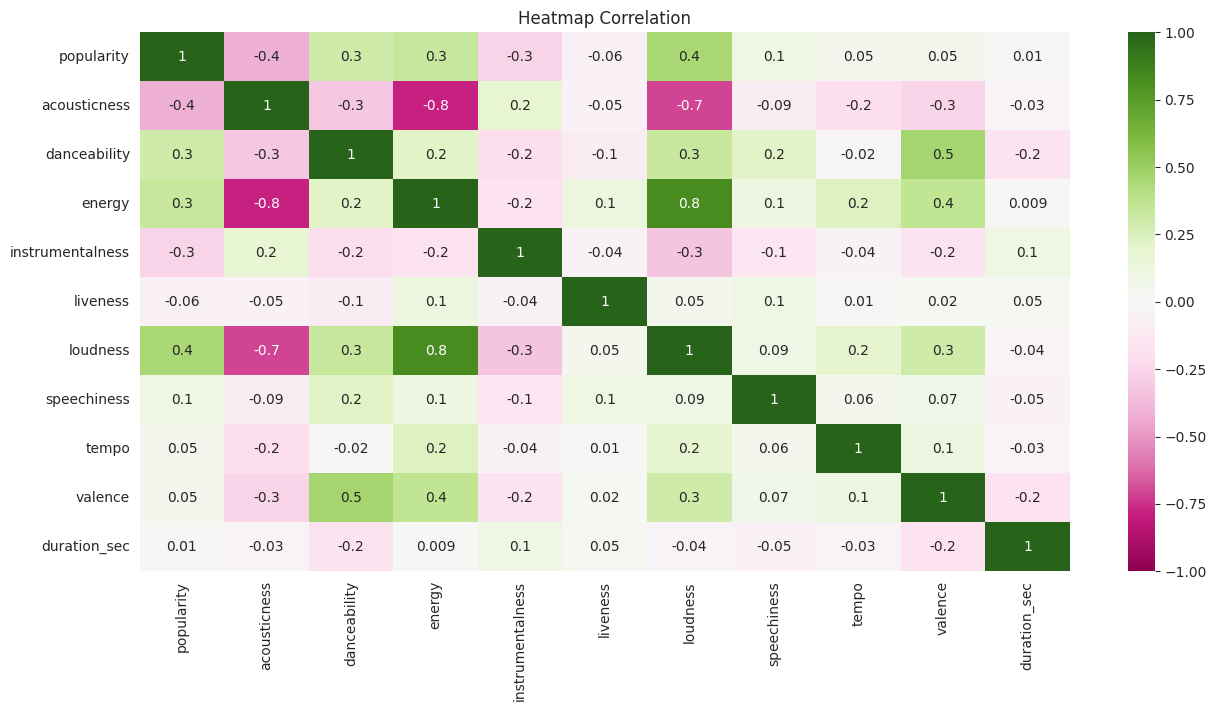

In [ ]:
df_corr = df.drop(["key", "mode"], axis=1).corr()
plt.figure(figsize=(15,7))
heatmap = sns.heatmap(df_corr, annot=True, fmt=".1g", vmin=-1, vmax=1, cmap="PiYG",linecolor="black")
heatmap.set_title("Heatmap Correlation")
plt.show()

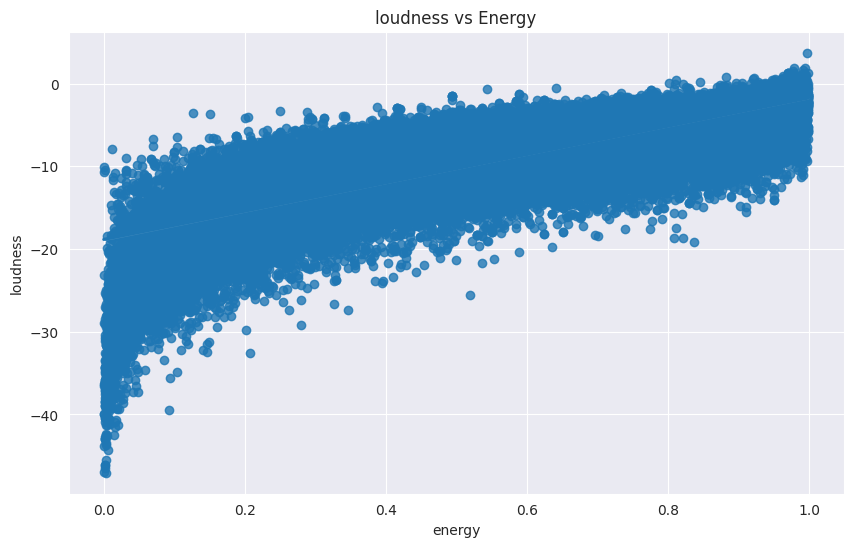

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data =df, y= "loudness", x = "energy").set(title="loudness vs Energy")
plt.show()

In [20]:
df_cols=df[['popularity','acousticness','danceability','duration_sec','energy','instrumentalness',
'liveness', 'loudness','speechiness', 'tempo', 'time_signature', 'valence']]

In [21]:
df_copy=df_cols
df_copy.head()

popularity  acousticness  danceability  duration_sec  energy  \
0           0         0.611         0.389            99   0.910   
1           1         0.246         0.590           137   0.737   
2           3         0.952         0.663           170   0.131   
3           0         0.703         0.240           152   0.326   
4           4         0.950         0.331            83   0.225   

   instrumentalness  liveness  loudness  speechiness    tempo time_signature  \
0             0.000    0.3460    -1.828       0.0525  166.969          4-Apr   
1             0.000    0.1510    -5.559       0.0868  174.003          4-Apr   
2             0.000    0.1030   -13.879       0.0362   99.488          4-May   
3             0.000    0.0985   -12.178       0.0395  171.758          4-Apr   
4             0.123    0.2020   -21.150       0.0456  140.576          4-Apr   

   valence  
0    0.814  
1    0.816  
2    0.368  
3    0.227  
4    0.390

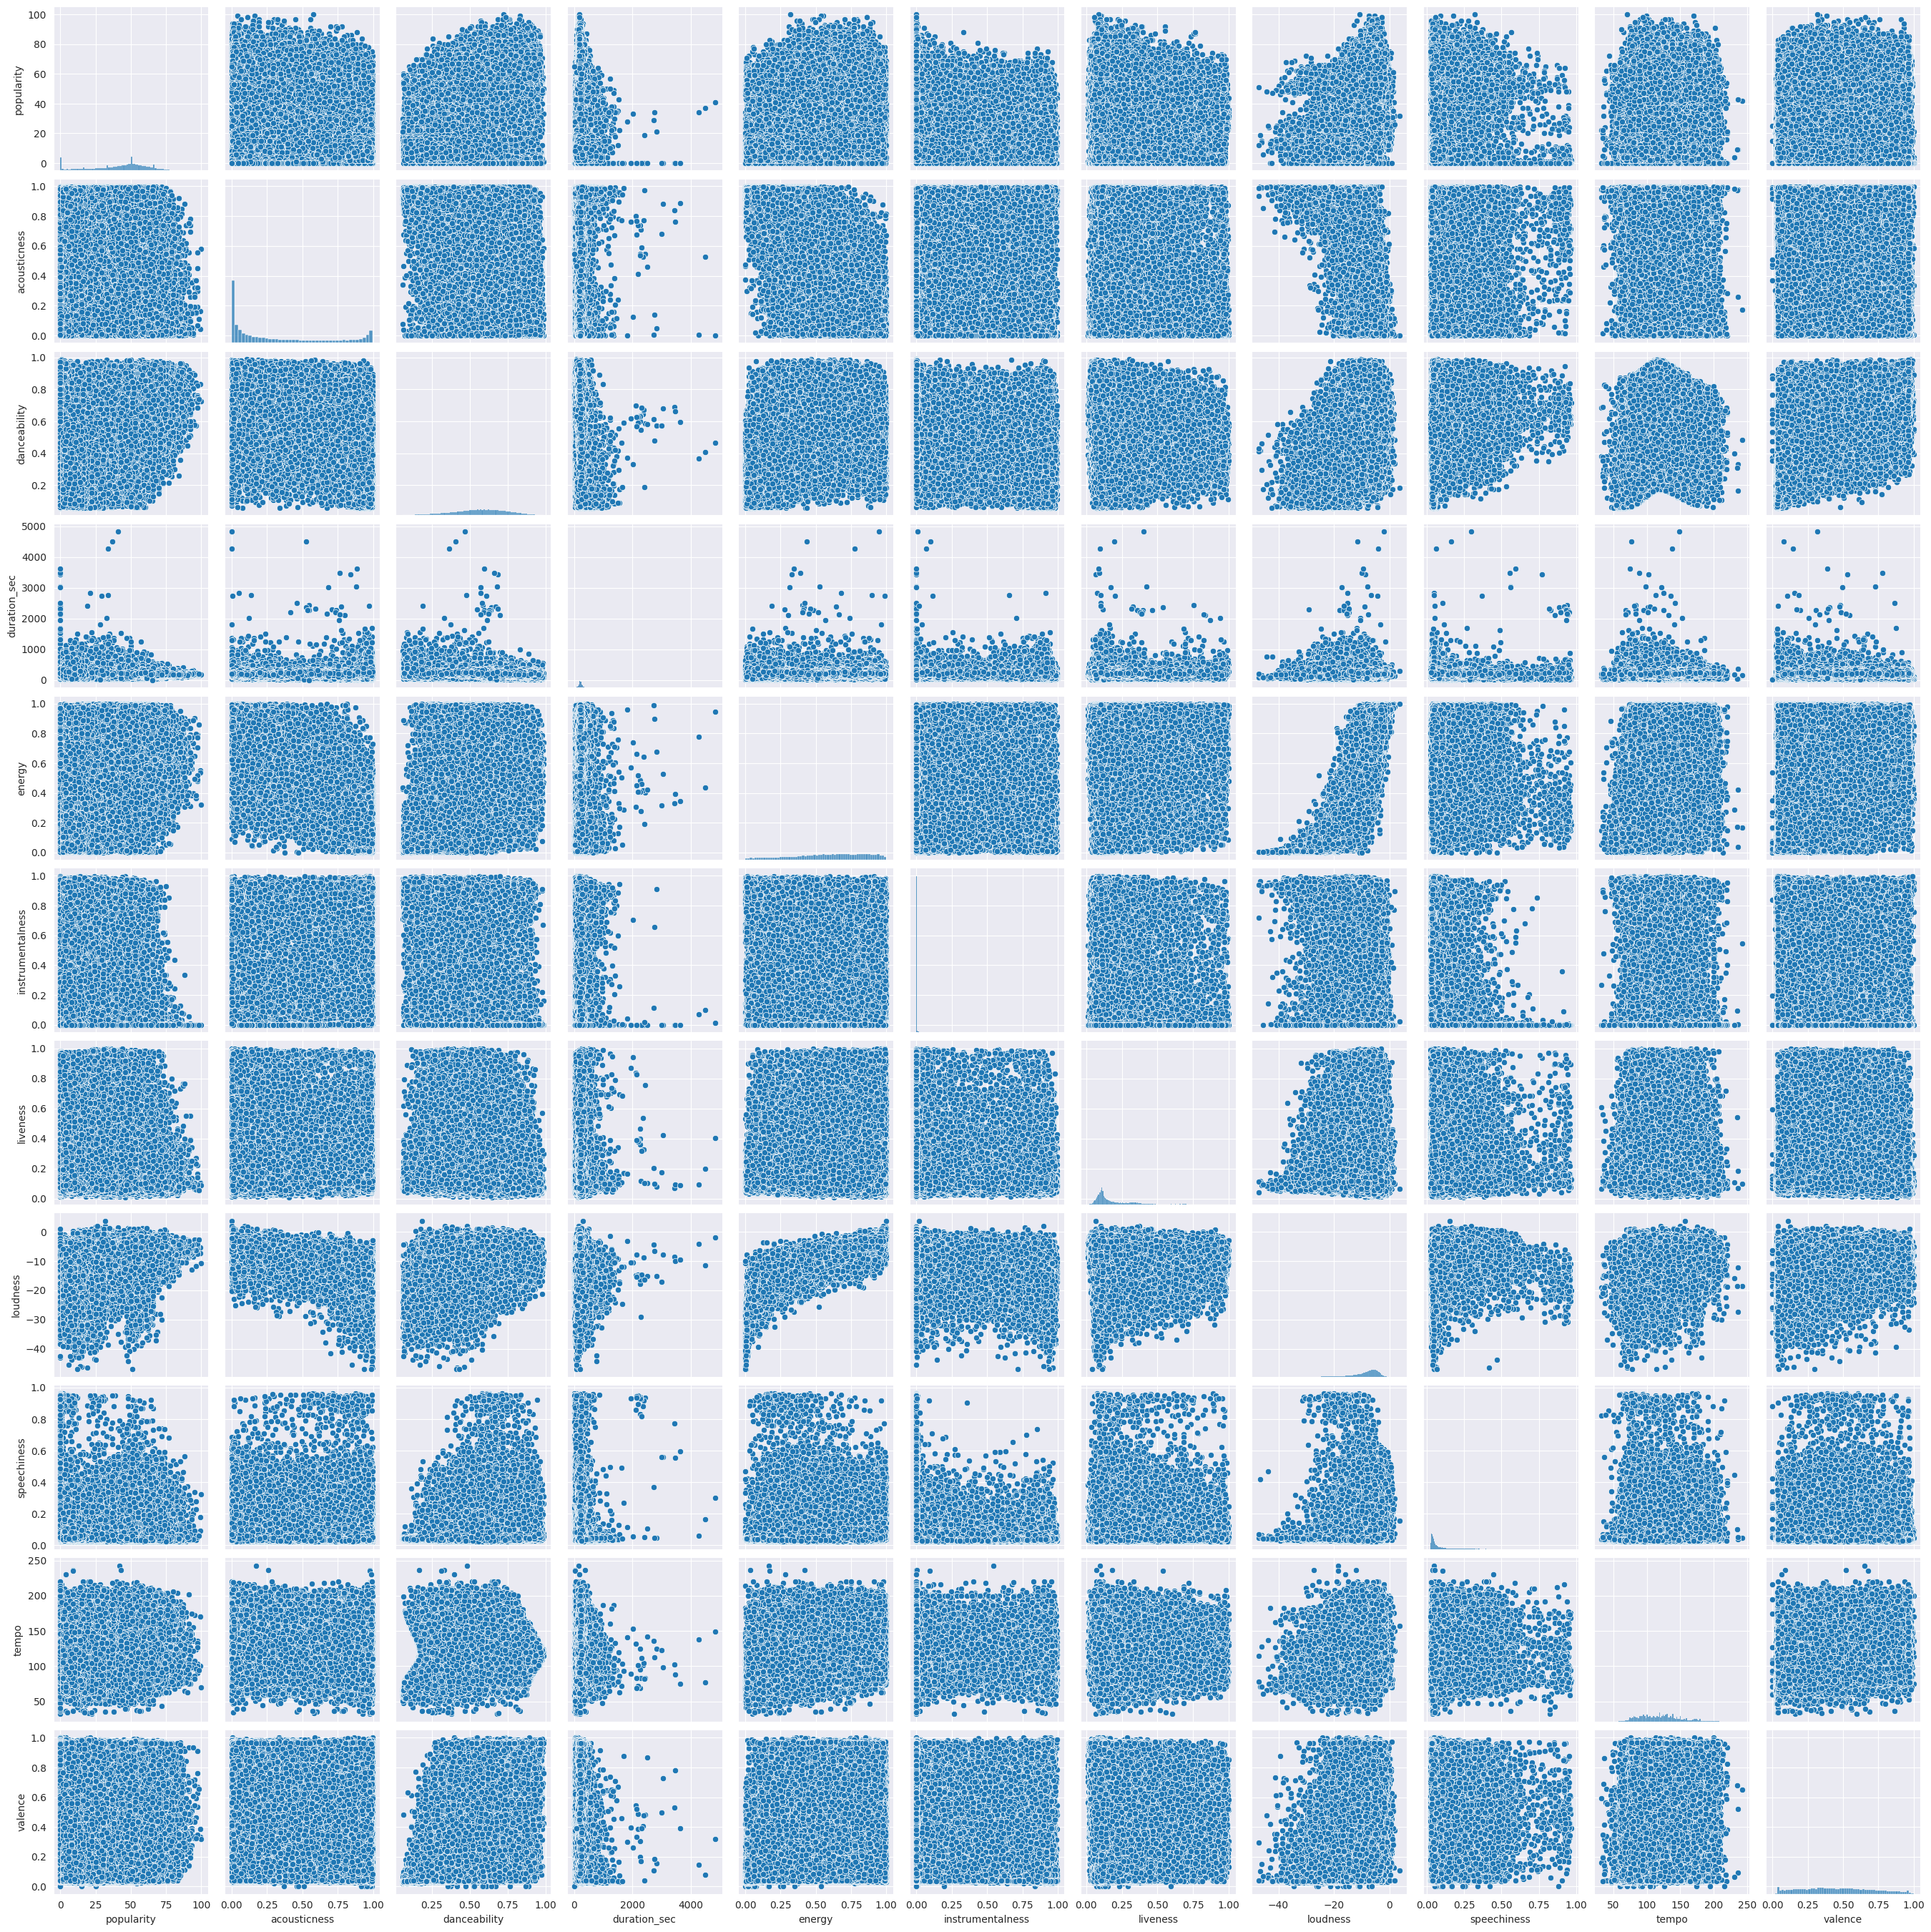

In [22]:
sns.pairplot(df_copy)

<Axes: >

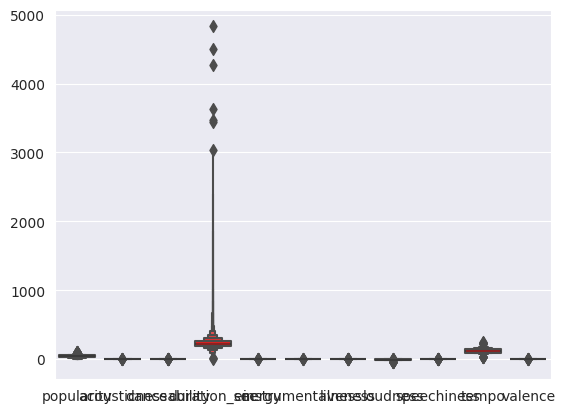

In [23]:
sns.boxenplot(data=df_copy,color='Red')

Top 5 Popular Artists And Visualization

In [24]:
top_5_artists=df.groupby('artist_name').count().sort_values('track_name',ascending=False)['track_name'][:5]

In [25]:
top_5_artists.head()

artist_name
Giuseppe Verdi            1312
Giacomo Puccini           1094
Kimbo Children's Music     971
Richard Wagner             779
Nobuo Uematsu              772
Name: track_name, dtype: int64

<Axes: xlabel='artist_name'>

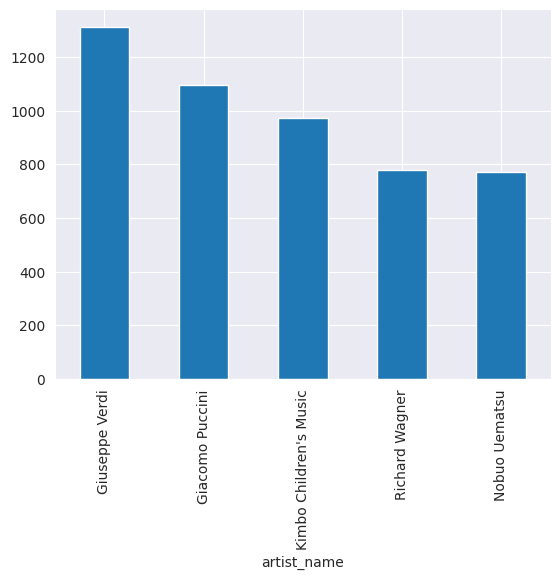

In [26]:
top_5_artists.plot.bar()

Top 5 Populer songs And Visualization

In [27]:
df_pop=df.sort_values('popularity',ascending=False)
df_pop.head()

genre    artist_name                                track_name  \
9027    Dance  Ariana Grande                                   7 rings   
107804    Pop  Ariana Grande                                   7 rings   
9026    Dance  Ariana Grande  break up with your girlfriend, i'm bored   
107803    Pop    Post Malone                                      Wow.   
107802    Pop  Ariana Grande  break up with your girlfriend, i'm bored   

                      track_id  popularity  acousticness  danceability  \
9027    14msK75pk3pA33pzPVNtBF         100        0.5780         0.725   
107804  14msK75pk3pA33pzPVNtBF         100        0.5780         0.725   
9026    4kV4N9D1iKVxx1KLvtTpjS          99        0.0421         0.726   
107803  6MWtB6iiXyIwun0YzU6DFP          99        0.1630         0.833   
107802  4kV4N9D1iKVxx1KLvtTpjS          99        0.0421         0.726   

        energy  instrumentalness key  liveness  loudness   mode  speechiness  \
9027     0.321          0.000000  C#    0.0884   -10.744  Minor       0.3230   
107804   0.321          0.000000  C#    0.0884   -10.744  Minor       0.3230   
9026     0.554          0.000000   F    0.1060    -5.290  Minor       0.0917   
107803   0.539          0.000002   B    0.1010    -7.399  Minor       0.1780   
107802   0.554          0.000000   F    0.1060    -5.290  Minor       0.0917   

          tempo time_signature  valence  duration_sec  
9027     70.142          4-Apr    0.319           179  
107804   70.142          4-Apr    0.319           179  
9026    169.999          4-Apr    0.335           190  
107803   99.947          4-Apr    0.385           150  
107802  169.999          4-Apr    0.335           190

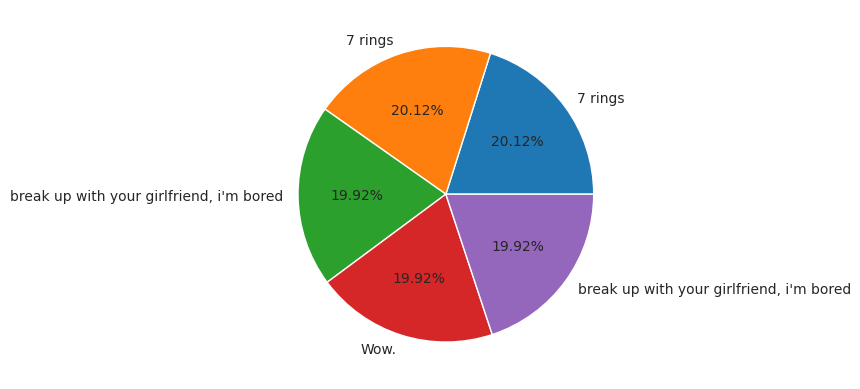

In [28]:
plt.pie(x='popularity',data=df_pop.head(),autopct='%1.2f%%',labels='track_name')
plt.show()

Top 5 Loudest Tracks

In [29]:
Top_loud_tracks=df[['loudness','track_name']].sort_values('loudness',ascending=True)

In [30]:
Top_loud_tracks.head()

loudness                                         track_name
105043   -47.046  Ma mère l'oye, M. 60 (Version for Piano Duo): ...
105185   -46.985  Via Crucis, S. 53: Station XIII. Jesus wird vo...
104719   -46.507     Diabelli Variations, Op. 120: Var. 20, Andante
105173   -46.122  Via Crucis, S. 53: Station IV. Jesus begegnet ...
105175   -46.052  Via Crucis, S. 53: Station V. Simon von Kyrene...

Top 5 Instrumentalness Songs

In [31]:
top_inst_tracks=df[['track_name','artist_name','instrumentalness']].sort_values('instrumentalness',ascending=False)

In [32]:
top_inst_tracks.head()

track_name             artist_name  \
76749  My Bonnie Lies Over the Ocean - Instrumental  Children Songs Company   
31144                           Kingdom of Burmecia           Nobuo Uematsu   
34781                                ??????? ??????       Capcom Sound Team   
82257  Madama Butterfly / Act 2: 27. Humming Chorus         Giacomo Puccini   
22490                                         Arena               Daft Punk   

       instrumentalness  
76749             0.997  
31144             0.997  
34781             0.996  
82257             0.994  
22490             0.994

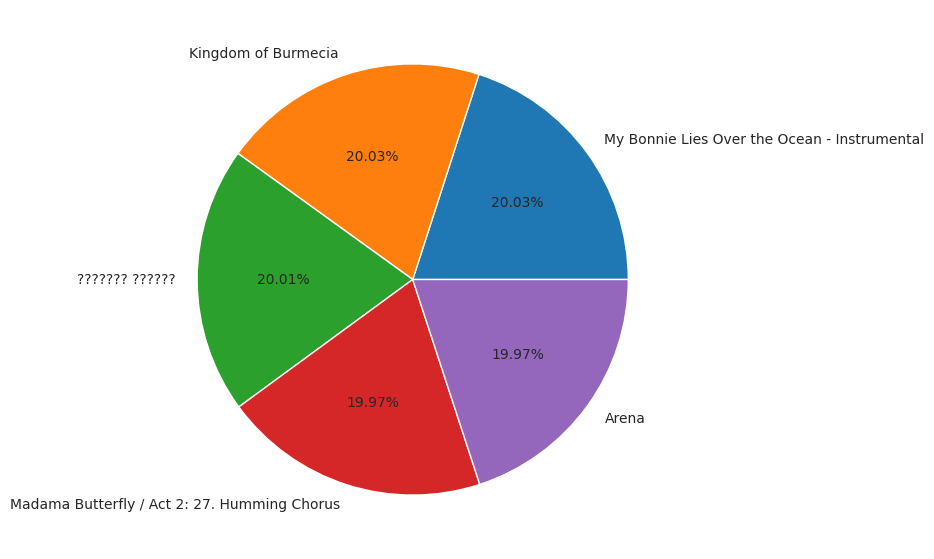

In [33]:
plt.figure(figsize=(12,7))
plt.pie(x='instrumentalness',data=top_inst_tracks.head(),autopct='%1.2f%%',labels='track_name')
plt.show()

Top 5 Artist With Most danceability Songs

In [34]:
top_dance_songs=df[['danceability','track_name','artist_name']].sort_values('danceability',ascending=False)

In [35]:
top_dance_songs=top_dance_songs.head()

In [36]:
top_dance_songs

danceability            track_name  artist_name
75396         0.989           Fuzzy Wuzzy  Juice Music
75762         0.987  I've Been Everywhere  Juice Music
26911         0.987              Sol Clap      Quantic
90205         0.986               Go Girl      Pitbull
23822         0.985     Who Loves the Sun           Nu

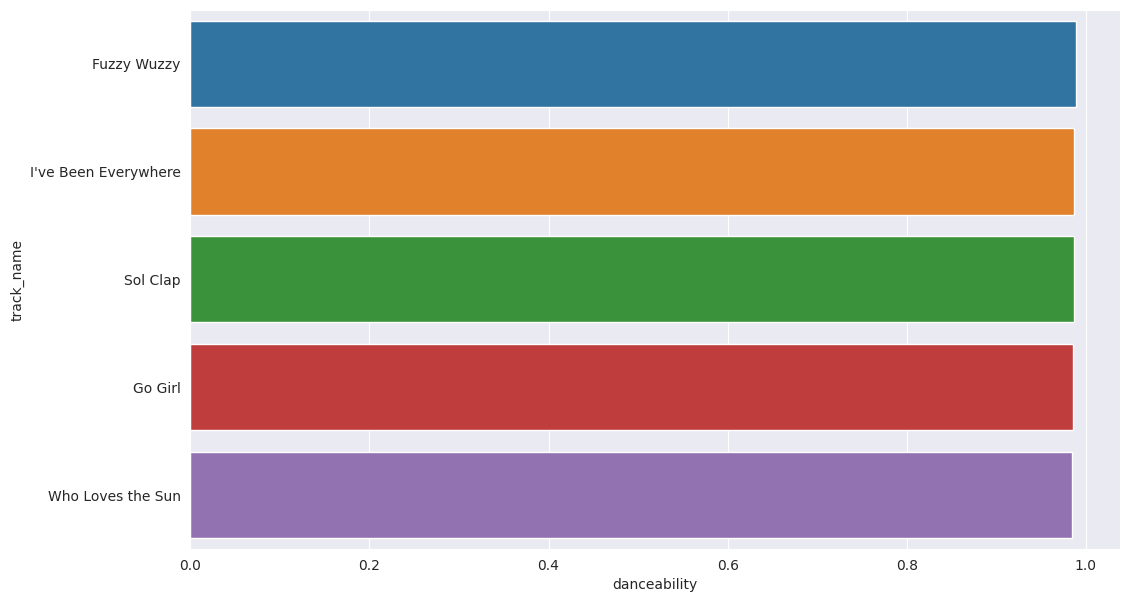

In [37]:
plt.figure(figsize=(12,7))
sns.barplot(x='danceability',y='track_name',data=top_dance_songs.head(6))
plt.show()

Top 5 Genres In Popularity

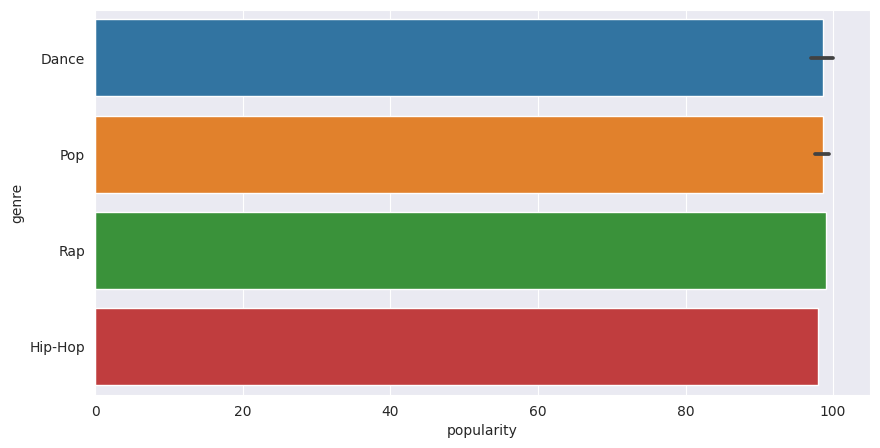

In [38]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
famous=df.sort_values('popularity',ascending=False)
sns.barplot(x='popularity',y='genre',data=famous.head(10))
plt.show()

Top 5 songs which are more energetic

In [39]:
top_energetic=df[['energy','track_name','artist_name']].sort_values('energy',ascending=False)

In [40]:
top_energetic.head()

energy          track_name    artist_name
30778   0.999     eternal reality       fripSide
24427   0.999              Wicked    Bear Grillz
19270   0.999      Caramelldansen       Caramell
27030   0.999     Total Knock Out      Lil Texas
33710   0.999  Miku No Shoushitsu  cosMo@bousouP

Duration Of Songs In Different Genres

Text(0, 0.5, 'Genres')

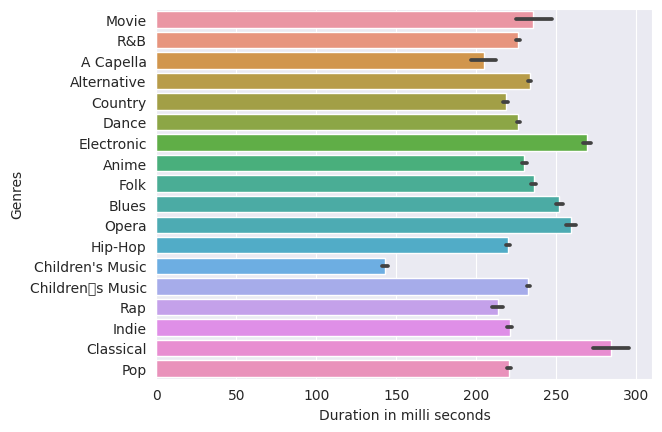

In [41]:
sns.color_palette("rocket", as_cmap= True)
sns.barplot (y='genre', x='duration_sec', data=df)
plt.xlabel("Duration in milli seconds")
plt.ylabel("Genres")